# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Dense, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

C:\Users\rayan\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rayan\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\rayan\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.0
X_test = X_test_orig/255.0

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


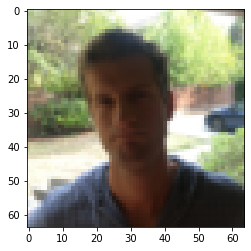

In [4]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

In [5]:
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation = 'relu', padding='same', input_shape = (64, 64, 3)),
    MaxPooling2D(2,2),
    Dropout(0.1),
    
    Conv2D(32, kernel_size=(3, 3), padding='same', activation = 'relu'),
    MaxPooling2D(2,2),
    Dropout(0.1),
    
    Conv2D(64, kernel_size=(3, 3), padding='same', activation = 'relu'),
    
    Flatten(),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')])

model2 = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation = 'relu', padding='same', input_shape = (64, 64, 3)),
    MaxPooling2D(2,2),
    Dropout(0.1),
    
    Conv2D(32, kernel_size=(3, 3), padding='same', activation = 'relu'),
    MaxPooling2D(2,2),
    Dropout(0.1),
    
    Conv2D(64, kernel_size=(3, 3), padding='same', activation = 'relu'),
    
    Flatten(),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')])

model3 = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation = 'relu', padding='same', input_shape = (64, 64, 3)),
    MaxPooling2D(2,2),
    Dropout(0.1),
    
    Conv2D(32, kernel_size=(3, 3), padding='same', activation = 'relu'),
    MaxPooling2D(2,2),
    Dropout(0.1),
    
    Conv2D(64, kernel_size=(3, 3), padding='same', activation = 'relu'),
    
    Flatten(),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [7]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

model2.compile(optimizer="sgd", loss='binary_crossentropy', metrics=["accuracy"])

model3.compile(optimizer="RMSprop", loss='binary_crossentropy', metrics=["accuracy"])

In [8]:
history_model = model.fit(X_train, Y_train, batch_size=1, epochs=10, validation_data=(X_test, Y_test), shuffle=True)

history_model2 = model2.fit(X_train, Y_train, batch_size=1, epochs=10, validation_data=(X_test, Y_test), shuffle=True)

history_model3 = model3.fit(X_train, Y_train, batch_size=1, epochs=10, validation_data=(X_test, Y_test), shuffle=True)

Epoch 1/10
600/600 [==============================] - 10s 16ms/step - loss: 0.6980 - accuracy: 0.5100 - val_loss: 0.6973 - val_accuracy: 0.5600
Epoch 2/10
600/600 [==============================] - 10s 16ms/step - loss: 0.4811 - accuracy: 0.7700 - val_loss: 0.2559 - val_accuracy: 0.9067
Epoch 3/10
600/600 [==============================] - 11s 18ms/step - loss: 0.2130 - accuracy: 0.9217 - val_loss: 0.4512 - val_accuracy: 0.8600
Epoch 4/10
600/600 [==============================] - 9s 16ms/step - loss: 0.1500 - accuracy: 0.9467 - val_loss: 0.2279 - val_accuracy: 0.9267
Epoch 5/10
600/600 [==============================] - 10s 16ms/step - loss: 0.1299 - accuracy: 0.9533 - val_loss: 0.1324 - val_accuracy: 0.9533
Epoch 6/10
600/600 [==============================] - 10s 16ms/step - loss: 0.1186 - accuracy: 0.9450 - val_loss: 0.1744 - val_accuracy: 0.9333
Epoch 7/10
600/600 [==============================] - 9s 16ms/step - loss: 0.1022 - accuracy: 0.9717 - val_loss: 0.0988 - val_accuracy: 0

# Evaluate / Test

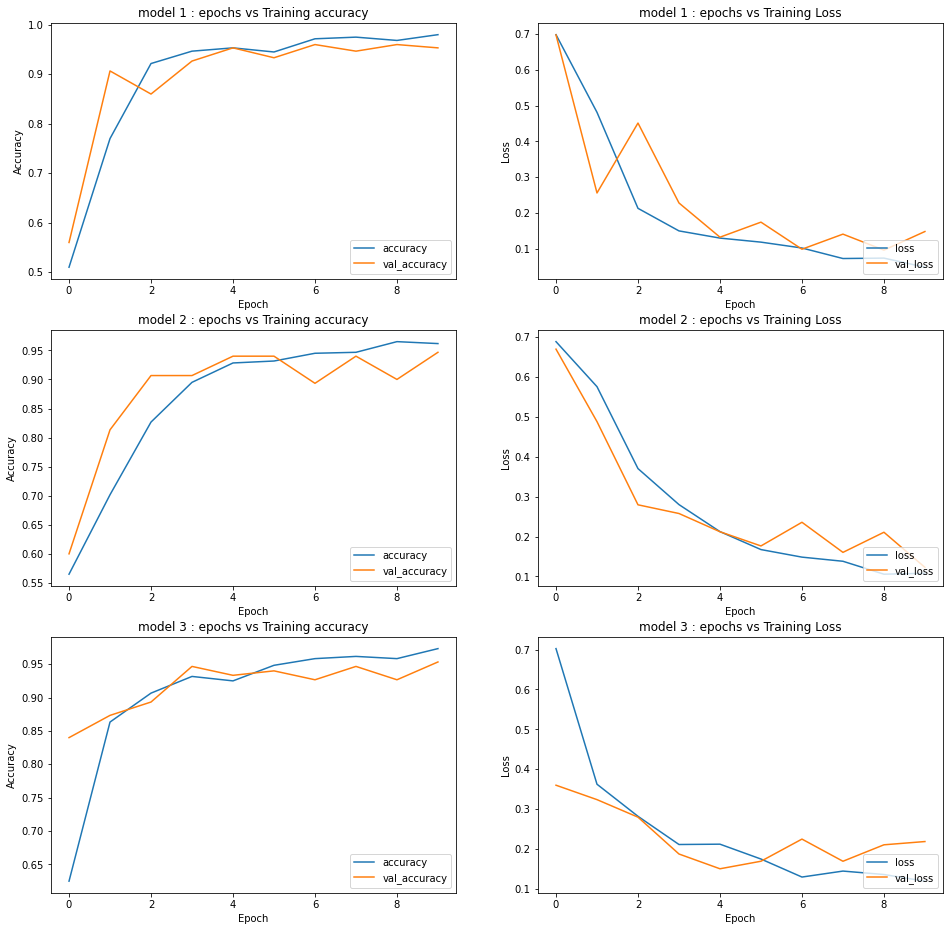

In [9]:
plt.figure(figsize=[16,16])
plt.subplot(321)

plt.plot(history_model.history['accuracy'], label='accuracy')
plt.plot(history_model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('model 1 : epochs vs Training accuracy')
plt.legend(loc='lower right')

plt.subplot(322)

plt.plot(history_model.history['loss'], label='loss')
plt.plot(history_model.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('model 1 : epochs vs Training Loss')
plt.legend(loc='lower right')

plt.subplot(323)

plt.plot(history_model2.history['accuracy'], label='accuracy')
plt.plot(history_model2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('model 2 : epochs vs Training accuracy')
plt.legend(loc='lower right')

plt.subplot(324)

plt.plot(history_model2.history['loss'], label='loss')
plt.plot(history_model2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('model 2 : epochs vs Training Loss')
plt.legend(loc='lower right')

plt.subplot(325)

plt.plot(history_model3.history['accuracy'], label='accuracy')
plt.plot(history_model3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('model 3 : epochs vs Training accuracy')
plt.legend(loc='lower right')

plt.subplot(326)

plt.plot(history_model3.history['loss'], label='loss')
plt.plot(history_model3.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('model 3 : epochs vs Training Loss')
plt.legend(loc='lower right')

### Evaluate Test set

In [10]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2, batch_size=1)

print('\nTest accuracy:', test_acc)

test_loss2, test_acc2 = model2.evaluate(X_test, Y_test, verbose=2, batch_size=1)

print('\nTest accuracy:', test_acc2)

test_loss3, test_acc3 = model3.evaluate(X_test, Y_test, verbose=2, batch_size=1)

print('\nTest accuracy:', test_acc3)

150/150 - 0s - loss: 0.1483 - accuracy: 0.9533

Test accuracy: 0.95333331823349
150/150 - 0s - loss: 0.1227 - accuracy: 0.9467

Test accuracy: 0.9466666579246521
150/150 - 0s - loss: 0.2190 - accuracy: 0.9533

Test accuracy: 0.95333331823349


### Results analysis

* <b>Loss & Accuracy</b> <br>
<b>We can notice that the 3 different optimizers perform quite similarly over-all.</b>

In [11]:
y_pred = model.predict(X_test)
y_pred1 = (y_pred > 0.5)
for f in range(len(y_pred)):
    if y_pred[f][0] > 0.5:
        y_pred[f][0]=1
    else:
        y_pred[f][0]=0

        
y_pred_2 = model2.predict(X_test)
y_pred1_2 = (y_pred_2 > 0.5)
for f in range(len(y_pred)):
    if y_pred_2[f][0] > 0.5:
        y_pred_2[f][0]=1
    else:
        y_pred_2[f][0]=0
        

y_pred_3 = model3.predict(X_test)
y_pred1_3 = (y_pred_3 > 0.5)
for f in range(len(y_pred)):
    if y_pred_3[f][0] > 0.5:
        y_pred_3[f][0]=1
    else:
        y_pred_3[f][0]=0

### Confusion Matrix

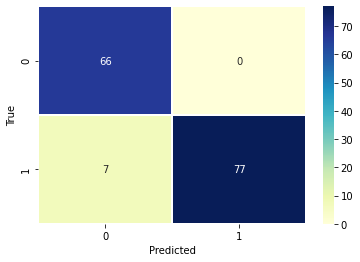

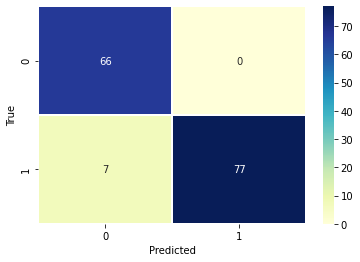

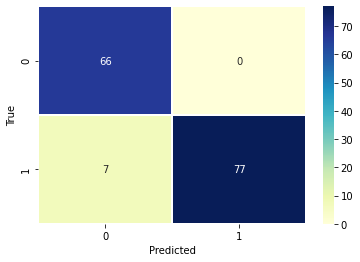

In [12]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',linewidths=1, cmap="YlGnBu") 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

cm2 = confusion_matrix(Y_test, y_pred_2)
sns.heatmap(cm, annot=True, fmt='d',linewidths=1, cmap="YlGnBu") 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

cm3 = confusion_matrix(Y_test, y_pred_3)
sns.heatmap(cm, annot=True, fmt='d',linewidths=1, cmap="YlGnBu") 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)


prediction is :  sad 
 reel is : sad


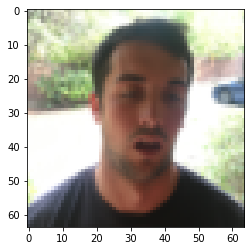

In [13]:
import random

g=random.randint(0, 150)

imshow(X_test[g])

prediction = y_pred[g][0]
if prediction == 0:
    prediction="sad"
else:
    prediction="happy"
reel = Y_test[g][0]
if reel == 0:
    reel="sad"
else:
    reel="happy"
print("prediction is : ",prediction,"\n reel is :",reel)